In [78]:
!pip install handcalcs

In [79]:
import wbdata
import pandas as pd
import numpy as np
import statsmodels
import datetime
import handcalcs.render

In [80]:
%%render

a = 2
b = 3
c = 2*a + b/3

<IPython.core.display.Latex object>

In [81]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [82]:
wbdata.get_indicator(source=2) 

id                         name
-------------------------  --------------------------------------------------------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO             Agricultural machinery, tractors
AG.CON.FERT.PT.ZS          Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS             Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2             Agricultural land (sq. km)
AG.LND.AGRI.ZS             Agricultural land (% of land area)
AG.LND.ARBL.HA             Arable land (hectares)
AG.LND.ARBL.HA.PC          Arable land (hectares per person)
AG.LND.ARBL.ZS             Arable land (% of land area)
AG.LND.CREL.HA             Land under cereal production (hectares)
AG.LND.CROP.ZS             Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2          Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS          Rural land area where elevation is below 5 met

"Inflation, consumer prices (annual %)" (source: World Development Indicators): Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services

"External debt stocks, total (DOD, current US$)" (source: International Debt Statistics): Total external debt is debt owed to nonresidents repayable in currency, goods, or services.

"Lending interest rate (%) - Real" (source: International Financial Statistics)

"Control of Corruption" (source: Worldwide Governance Indicators)

### Exercise Medium OLS

In [83]:
wbdata.search_indicators("government effectivenes")

id                name
----------------  ---------------------------------------------------------------------------------
GE.EST            Government Effectiveness: Estimate
GE.NO.SRC         Government Effectiveness: Number of Sources
GE.PER.RNK        Government Effectiveness: Percentile Rank
GE.PER.RNK.LOWER  Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval
GE.PER.RNK.UPPER  Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval
GE.STD.ERR        Government Effectiveness: Standard Error
GV.GOVT.EF.ES     Government Effectiveness (estimate)
GV.GOVT.EF.NO     Government Effectiveness (number of surveys/polls)
GV.GOVT.EF.SE     Government Effectiveness (standard error)

In [84]:
hic_countries = [i['id'] for i in wbdata.get_country(incomelevel='HIC')]
umc_countries = [i['id'] for i in wbdata.get_country(incomelevel='UMC')]

data_date = datetime.datetime(2018, 1, 1), datetime.datetime(2018, 12, 31) 

indicators = {
    'GC.DOD.TOTL.GD.ZS': 'debt_gdp_ratio', # Central government debt, total (% of GDP)
    'GE.EST': 'gov_effectiveness', # Government Effectiveness: Estimate
    'FP.CPI.TOTL': 'inflation', # Inflation, consumer prices (annual %)
    'SE.XPD.TOTL.GD.ZS': 'public_investment', # Government expenditure on education, total (% of GDP)
    'EN.ATM.CO2E.PP.GD': 'co2_emission', #CO2 emissions (kg per PPP $ of GDP)
    'NY.GDP.MKTP.KD.ZG': 'gdp_growth' # GDP growth (annual %)
} 

df_hic = wbdata.get_dataframe(indicators, country=hic_countries, data_date=data_date , convert_date=True)
df_umc = wbdata.get_dataframe(indicators, country=umc_countries, data_date=data_date , convert_date=True)

# drop countries with missing data
df_hic = df_hic.dropna()
df_umc = df_umc.dropna()

In [85]:
df_umc

,debt_gdp_ratio,gov_effectiveness,inflation,public_investment,co2_emission,gdp_growth
country,,,,,,
Albania,64.570326,0.110513,117.392740,3.154901,0.132098,4.019360
Bulgaria,28.685916,0.140735,110.974059,4.045300,0.253005,2.684761
Belarus,37.095737,-0.255736,481.390314,5.381110,0.321469,3.149198
Brazil,86.607884,-0.498852,161.373814,6.088510,0.137952,1.783667
Botswana,15.230715,0.280856,145.713267,6.721310,0.194651,4.189834
Colombia,71.650435,-0.111110,136.151216,4.449100,0.105193,2.564324
Georgia,38.887743,0.558673,127.428492,3.521060,0.175968,4.842920
Guatemala,26.483325,-0.685639,137.822003,3.137050,0.129240,3.406873
Kazakhstan,21.992237,-0.005484,179.120700,2.615950,0.453125,4.100000


In [86]:
import statsmodels.api as sm

def run_ols_model(df, dependent_var, independent_vars):
    X = df[independent_vars]
    Y = df[dependent_var]
    
    X = sm.add_constant(X)
    
    model = sm.OLS(Y, X).fit()
    
    return model

In [87]:
OLS_hic = run_ols_model(df_hic, 'gdp_growth', ['debt_gdp_ratio',
                                                   'gov_effectiveness', 
                                                   'inflation', 
                                                   'public_investment', 
                                                   'co2_emission'])
print(OLS_hic.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1.557
Date:                Tue, 21 Feb 2023   Prob (F-statistic):              0.220
Time:                        08:35:49   Log-Likelihood:                -44.698
No. Observations:                  25   AIC:                             101.4
Df Residuals:                      19   BIC:                             108.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.4008      3.43

In [88]:
OLS_umc = run_ols_model(df_umc, 'gdp_growth', ['debt_gdp_ratio',
                                                   'gov_effectiveness', 
                                                   'inflation', 
                                                   'public_investment', 
                                                   'co2_emission'])
print(OLS_umc.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5.742
Date:                Tue, 21 Feb 2023   Prob (F-statistic):            0.00622
Time:                        08:35:49   Log-Likelihood:                -18.622
No. Observations:                  18   AIC:                             49.24
Df Residuals:                      12   BIC:                             54.59
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3256      0.82

C:\Users\Bonoc\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_vif(data, thresh=5.0):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in a dataset and
    returns a DataFrame with the results. Features with VIF greater than `thresh` are
    considered to be highly correlated and should be removed from the dataset.

    Parameters
    ----------
    data : pandas.DataFrame
        The dataset to calculate VIF for.
    thresh : float, optional
        The threshold above which a VIF is considered to indicate high correlation.
        The default value is 10.0.

    Returns
    -------
    pandas.DataFrame
        A DataFrame containing the VIF for each feature in `data`, indexed by feature name.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif_data = vif_data.sort_values("VIF", ascending=False).reset_index(drop=True)
    return vif_data

def display_corr_matrix(data_list, cmap='coolwarm'):
    """
    Displays a correlation matrix of a dataset using a heatmap.

    Parameters
    ----------
    data_list : list of pandas.DataFrame
        The list of datasets to display a correlation matrix for.
    cmap : str, optional
        The color map to use for the heatmap. The default value is 'coolwarm'.
    """
    fig, axs = plt.subplots(1, len(data_list), figsize=(12, 5))

    for i, data in enumerate(data_list):
        corr = data.corr()
        sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', square=True, cbar=False, ax=axs[i])
        axs[i].set_title(f'Correlation Matrix ({"" if i == 0 else "Upper Middle "}Income Countries)', fontsize=14)

    fig.tight_layout()
    plt.show()


In [90]:
vif_hic_analysis = calculate_vif(df_hic)
vif_umc_analysis = calculate_vif(df_umc)

print("High Income Countries")
print(vif_hic_analysis)
print(" ")
print("Upper-Middle Income Countries")
print(vif_umc_analysis)

High Income Countries
             Feature        VIF
0          inflation  20.393056
1  public_investment  16.783870
2  gov_effectiveness   6.121820
3       co2_emission   4.740707
4         gdp_growth   3.790032
5     debt_gdp_ratio   3.400880
 
Upper-Middle Income Countries
             Feature       VIF
0  public_investment  6.602163
1          inflation  5.834921
2         gdp_growth  4.545146
3       co2_emission  3.587524
4     debt_gdp_ratio  3.576801
5  gov_effectiveness  1.271900


In [91]:
df_hic.corr()

,debt_gdp_ratio,gov_effectiveness,inflation,public_investment,co2_emission,gdp_growth
debt_gdp_ratio,1.000000,-0.040714,-0.227918,-0.236170,-0.061035,-0.328077
gov_effectiveness,-0.040714,1.000000,-0.263724,0.357418,-0.047794,-0.113389
inflation,-0.227918,-0.263724,1.000000,0.110067,-0.117826,-0.207162
public_investment,-0.236170,0.357418,0.110067,1.000000,-0.132335,-0.106612
co2_emission,-0.061035,-0.047794,-0.117826,-0.132335,1.000000,-0.112627
gdp_growth,-0.328077,-0.113389,-0.207162,-0.106612,-0.112627,1.000000


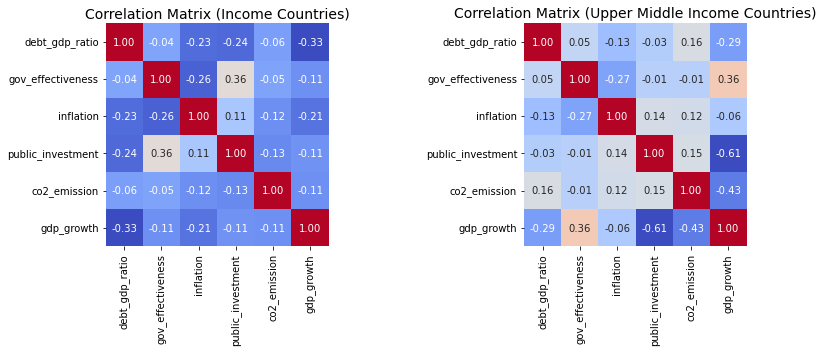

In [92]:
#corr_matrix_hic = display_corr_matrix(df_hic)
display_corr_matrix([df_hic, df_umc])

In [93]:
def qq_plot(models, titles=["QQ plot - High Income OLS - residuals", 
                            "QQ plot - Upper-Middle Income OLS - residuals"]):
    """
    Plots a QQ plot for the residuals of a list of OLS models.

    Args:
    models: A list of OLS regression models from statsmodels.
    titles: Titles for the QQ plots

    Returns:
    QQ plots of the residuals.
    """
    fig, axs = plt.subplots(1, len(models), figsize=(6*len(models),6))
    for i, model in enumerate(models):
        res = model.resid
        sm.qqplot(res, line='s', ax=axs[i])
        axs[i].set(title=titles[i])
    plt.show()

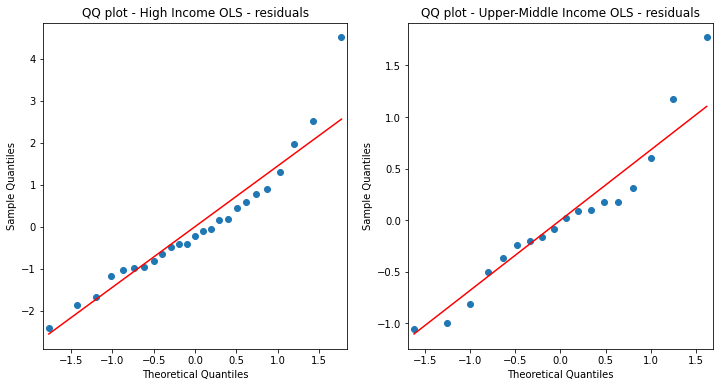

In [94]:
qq_plot([OLS_hic, OLS_umc])

In [95]:
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow, normal_ad, acorr_breusch_godfrey

def check_assumptions(olsmodels):
    """
    Performs the most widely used statistical tests for checking OLS model assumptions
    and displays the results in a pandas dataframe.

    Args:
    olsmodel: An OLS regression model from statsmodels.

    Returns:
    A pandas dataframe containing the results of the statistical tests for the model.
    """
    
    results_df = pd.DataFrame()
    names = ['OLS_hic', 'OLS_umc']
    
    for olsmodel, name in zip(olsmodels, names):
        residuals = olsmodel.resid
        variables = olsmodel.model.exog

        # homoscedasticity (Breusch-Pagan test)
        bp_test = het_breuschpagan(residuals, variables)
        bp_lmstatistic = bp_test[0] # langrange multiplier statistic
        bp_lmpvalue = bp_test[1]

        # no autocorrelation (Breusch-Godfrey test)
        bg_test = smd.acorr_breusch_godfrey(olsmodel)
        bg_lmstatistic = bg_test[0]
        bg_lmpvalue = bg_test[1]

        # linearity (Rainbow test)
        rainbow_statistic, rainbow_pvalue = linear_rainbow(olsmodel)

        # normality (Anderson-Darling test)
        ad_test = normal_ad(residuals)
        ad_statistic = ad_test[0]
        ad_pvalue = ad_test[1]

        # create pandas dataframe of results
        results = {'Model': name,
                   'Breusch-Pagan': [bp_lmstatistic, bp_lmpvalue],
                   'Breusch-Godfrey': [bg_lmstatistic, bg_lmpvalue],
                   'Rainbow': [rainbow_statistic, rainbow_pvalue],
                   'Anderson-Darling': [ad_statistic, ad_pvalue]}
        
        results = pd.DataFrame(results, index=['Statistic', 'p-value'])
    
        results_df = pd.concat([results_df, results])

    return results_df


In [96]:
check_assumptions([OLS_hic, OLS_umc])

,Model,Breusch-Pagan,Breusch-Godfrey,Rainbow,Anderson-Darling
Statistic,OLS_hic,4.710886,9.359125,0.703983,0.573499
p-value,OLS_hic,0.452173,0.095569,0.720886,0.122010
Statistic,OLS_umc,5.942232,4.070914,0.575906,0.473721
p-value,OLS_umc,0.311881,0.253908,0.771052,0.212585


### Exercise 2 (Shows residual analysis)

In [97]:
import pandas as pd
import wbdata

def get_data(indicators, countries, start_year, end_year):
    data_dates = (pd.to_datetime(start_year, format='%Y'), pd.to_datetime(end_year, format='%Y'))
    serieses = []
    for indicator, name in indicators.items():
        series = wbdata.get_series(indicator, country=countries, data_date=data_dates)
        serieses.append(pd.Series(series, name=name))
    return pd.concat(serieses, axis=1)


indicators = {
    'GC.DOD.TOTL.GD.ZS': 'debt', # Central government debt, total (% of GDP)
    'FR.INR.RINR': 'interest',
    'FP.CPI.TOTL': 'inflation',
    'NE.GDI.TOTL.ZS': 'investment',
    'NE.EXP.GNFS.ZS': 'exports',
    'NY.GDP.MKTP.KD.ZG': 'gdp_growth'
}

data = get_data(indicators, ['USA'], '1990', '2020')
data

,debt,interest,inflation,investment,exports,gdp_growth
date,,,,,,
2020,126.390496,2.210411,118.690502,21.050961,10.202126,-2.767803
2019,100.902573,3.427090,117.244195,21.319232,11.872470,2.294439
2018,99.149584,2.441415,115.157303,21.205917,12.360989,2.945385
2017,97.774934,2.156099,112.411557,20.813431,12.261738,2.241921
2016,98.504102,2.484530,110.067009,20.566778,11.939539,1.667472
2015,96.425228,2.237075,108.695722,21.200476,12.460993,2.706370
2014,95.766699,1.354776,108.566932,20.778368,13.545959,2.287776
2013,95.534688,1.473254,106.833849,20.343034,13.578074,1.841875
2012,93.649262,1.354075,105.291505,19.950723,13.644049,2.280688


In [98]:
import statsmodels.api as sm

def ols_model(y_var, x_vars):
    X = sm.add_constant(data[x_vars])
    y = data[y_var]
    model = sm.OLS(y, X).fit()
    return model.summary()

print(ols_model('gdp_growth', ['interest', 'inflation', 'investment', 'exports', 'debt']))


                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     6.997
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           0.000328
Time:                        08:35:50   Log-Likelihood:                -47.720
No. Observations:                  31   AIC:                             107.4
Df Residuals:                      25   BIC:                             116.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.5979      5.464     -3.587      0.0

In [99]:
print(ols_model('gdp_growth', ['interest', 'inflation', 'investment', 'exports']))

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     9.068
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           0.000100
Time:                        08:35:50   Log-Likelihood:                -47.747
No. Observations:                  31   AIC:                             105.5
Df Residuals:                      26   BIC:                             112.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.1312      4.890     -3.912      0.0

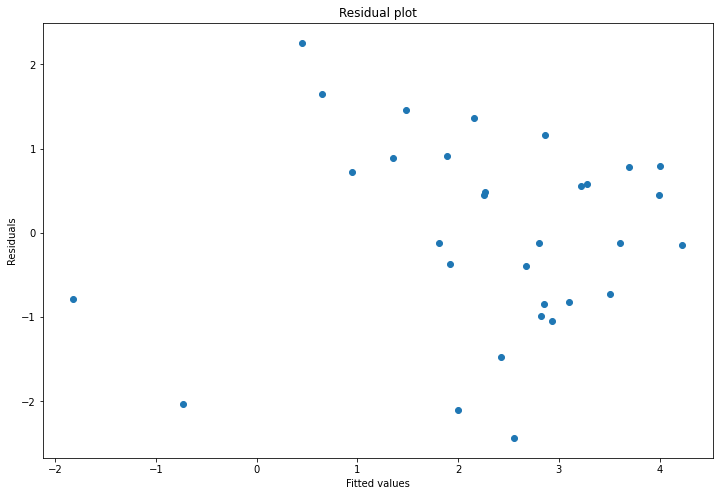

In [100]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro

# fit OLS model
X = data[['interest', 'inflation', 'investment', 'exports', 'debt']]
X = sm.add_constant(X) # add constant term
y = data['gdp_growth']
model = sm.OLS(y, X).fit()

# make predictions and calculate residuals
y_pred = model.predict(X)
resid = y - y_pred

# plot residuals vs. fitted values
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_pred, resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()



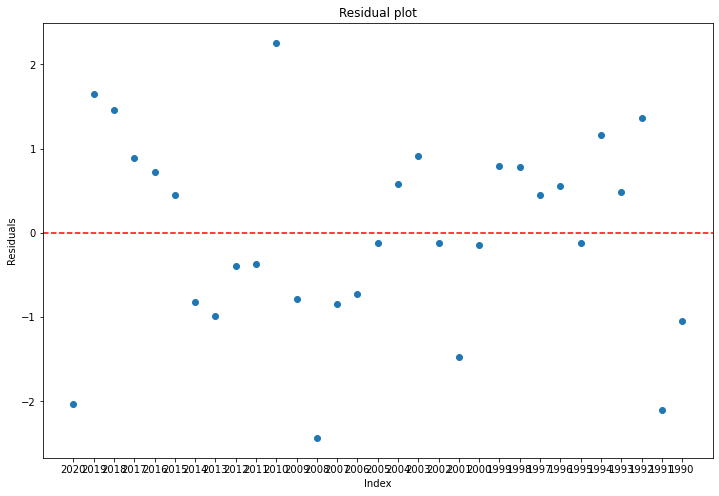

Residual summary statistics:
 count    3.100000e+01
mean    -2.492630e-15
std      1.146615e+00
min     -2.435550e+00
25%     -7.998337e-01
50%     -1.160552e-01
75%      7.903030e-01
max      2.256536e+00
dtype: float64

Residual skewness:  -0.3052803135261835
Residual kurtosis:  -0.35091944050158297

Jarque-Bera test p-value:  0.6912826965012973
Shapiro-Wilk test p-value:  0.7124851942062378


In [101]:

# plot residuals vs. index
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data.index, resid)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Index')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

# statistical analysis of residuals
print("Residual summary statistics:\n", resid.describe())
print("\nResidual skewness: ", resid.skew())
print("Residual kurtosis: ", resid.kurtosis())
print("\nJarque-Bera test p-value: ", sm.stats.stattools.jarque_bera(resid)[1])

shapiro_stat, shapiro_pvalue = shapiro(resid)
print('Shapiro-Wilk test p-value: ', shapiro_pvalue)